In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('heart_attack_prediction_dataset.csv')
raw_data.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## Check Data 

In [2]:
print(raw_data.info())
raw_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## Basic Data Preprocessing

In [3]:
# Let's normalize some values.
scaler = StandardScaler()
raw_data[['Age', 'Cholesterol']] = scaler.fit_transform(raw_data[['Age', 'Cholesterol']])

##Get rid of outliers (heart rate for now)
Q1 = raw_data['Heart Rate'].quantile(0.25)
Q3 = raw_data['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

raw_data = raw_data[(raw_data['Heart Rate'] >= lower_bound) & (raw_data['Heart Rate'] <= upper_bound)]

# Visualization

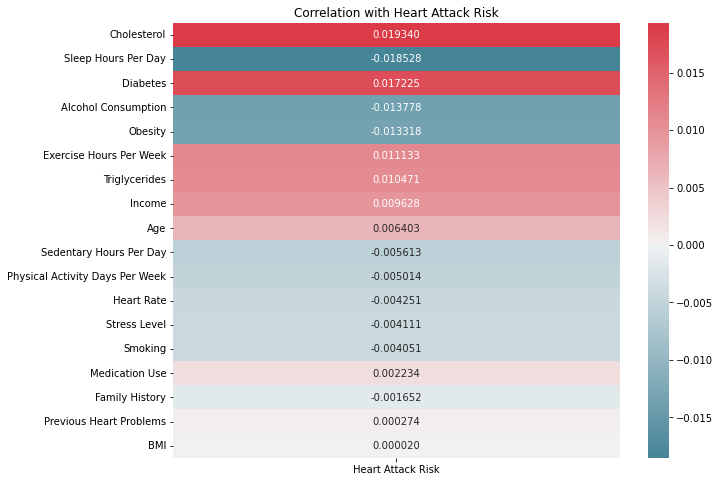

In [4]:
# Let's create our correlation matrix
numeric_columns = raw_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

# Calculate correlations between all variables and 'Heart Attack Risk'
corr_to_hrisk = correlation_matrix['Heart Attack Risk']

# Sort by magnitude(we care more about impact)
corr_to_hrisk = corr_to_hrisk.drop('Heart Attack Risk')  # Remove the correlation with itself
corr_to_hrisk = corr_to_hrisk.abs().sort_values(ascending=False)

# Create our color map for both positive and negative
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))

# Let's make our heatmap (sorted by absolute value)
sns.heatmap(
    correlation_matrix.loc[corr_to_hrisk.index, ['Heart Attack Risk']],
    annot=True,
    cmap=cmap,
    fmt=".6f",
    center=0, 
)

plt.title('Correlation with Heart Attack Risk')
plt.show()


# Random Forest Classifier

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import accuracy_score

# raw_data = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
raw_data = pd.read_csv('heart_attack_prediction_dataset.csv')
raw_data[['Systolic', 'Diastolic']] = raw_data['Blood Pressure'].str.split('/', expand=True).astype(int)
raw_data = raw_data.drop(columns=['Blood Pressure'])

label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country']

for col in categorical_cols:
    raw_data[col] = label_encoder.fit_transform(raw_data[col])



X = raw_data.drop(columns=['Patient ID', 'Heart Attack Risk','Hemisphere','Continent', 'Diet','Income','Country','Medication Use'])
y = raw_data['Heart Attack Risk']

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)

# start with base accuracy/model
best_accuracy = 0
best_model = None

# make 10 random trees and save best
for _ in range(10):  # lets do 10
    clf = RandomForestClassifier(n_estimators=50).fit(data_train, class_train)
    pred = clf.predict(data_test)
    current_accuracy = accuracy_score(class_test, pred)

    # assign best model based on test accuracy
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_model = clf

# Print the accuracy of the best model
print("Best Accuracy : ", best_accuracy)


from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

pred = best_model.predict(data_test)

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))



Best Accuracy :  0.6396807297605474
Accuracy :  0.6396807297605474
Mean Square Error :  0.3603192702394527
[0 0 0 1 0]
Confusion Matrix for each label : 
[[[ 23 287]
  [ 29 538]]

 [[538  29]
  [287  23]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       567
           1       0.44      0.07      0.13       310

    accuracy                           0.64       877
   macro avg       0.55      0.51      0.45       877
weighted avg       0.58      0.64      0.54       877



In [25]:
print(X.columns)

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic', 'Diastolic'],
      dtype='object')


In [26]:
print(len(X.columns))

19


In [27]:
print(list(X.iloc[2]))

[21.0, 0.0, 324.0, 72.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0783529861178884, 1.0, 9.0, 9.463425838029828, 28.176570683909876, 587.0, 4.0, 4.0, 174.0, 99.0]


# Random Forest with over sampling

In [33]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [34]:
from joblib import load 
model=load('random_forest_model.pkl')
prediction=model.predict(data_test) 
print(prediction)

[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 